# Chapter 5: SVMs

The following Scikit-Learn code loads the iris dataset and trains a linear SVM classifier to detect Iris virginica
flowers. The pipeline first scales the features, then uses a LinearSVC with C=1:

In [1]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # iris virginica

svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1,
                                                   random_state=42))
svm_clf.fit(X, y)

,steps,"[('standardscaler', ...), ('linearsvc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001


In [2]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [3]:
# let's look at the score that the SVM used to make predictions
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

## Nonlinear SVM Classification

One approach to handling nonlinear datasets is to add more features, such as polynomial features; in some cases this can result in a linearly separable dataset.

In [4]:
# example
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42))

polynomial_svm_clf.fit(X, y)

,steps,"[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


### Polynomial Kernel

Testing polynomial kernel trick on the moons dataset

In [5]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'poly'
,degree,3
,gamma,'scale'


The hyperparameter coef0 controls how much the model is influenced by high-degree terms versus low-degree terms.

### Gaussian RBF Kernel

Testing the Gaussian RBF kernel tricks on the moons dataset

In [6]:
rbf_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X,y)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,0.001
,kernel,'rbf'
,degree,3
,gamma,5


If model is overfitting, reduce gamma; if it is underfitting, increase gamma

## SVM Regression

In [7]:
from sklearn.svm import LinearSVR
import numpy as np

X = 2 * np.random.default_rng(seed=42).random((50,1))
y = 4 + 3 * X[:, 0] + np.random.default_rng(seed=42).standard_normal(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, dual=True, random_state=42))
svm_reg.fit(X, y)

,steps,"[('standardscaler', ...), ('linearsvr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,epsilon,0.5
,tol,0.0001
,C,1.0
,loss,'epsilon_insensitive'


To tackle nonlinear regression tasks, we can use a kernelized SVM model

In [8]:
from sklearn.svm import SVR

X = 2 * np.random.default_rng(seed=42).random((50, 1)) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.default_rng(seed=42).standard_normal(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(), SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

,steps,"[('standardscaler', ...), ('svr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,kernel,'poly'
,degree,2
,gamma,'scale'
,coef0,0.0


# Coding Questions

9. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model

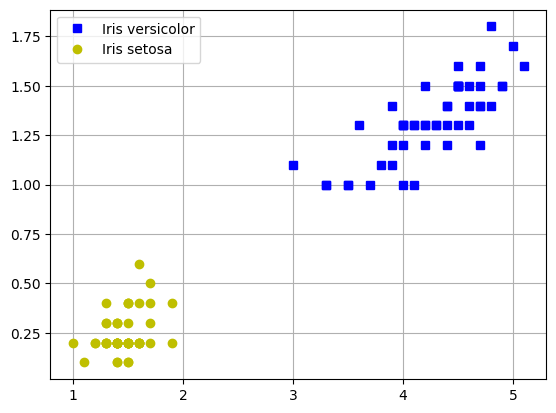

In [9]:
import matplotlib.pyplot as plt

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.grid()
plt.legend(loc="upper left")
plt.show()

Iris versicolor and Iris setosa are linearly separable, so I am going to use this dataset with those 2 classes

In [10]:
setosa_or_versicolor = (y == 0) | (y == 1)
# Scale and select only setosa and versicolor
X = StandardScaler().fit_transform(X[setosa_or_versicolor])
y = y[setosa_or_versicolor]

In [11]:
# svc uses the hinge loss instead of squared hinge loss
lin_svc = LinearSVC(random_state=42, loss="hinge")
lin_svc.fit(X, y)
lin_svc.coef_

array([[1.0607458 , 1.00177835]])

In [12]:
# setting max_iter and tol to equal the defaults of linear SVC
svc = SVC(kernel="linear", random_state=42, max_iter=1000, tol=0.0001)
svc.fit(X, y)
svc.coef_

array([[1.04342638, 0.94747825]])

In [13]:
from sklearn.linear_model import SGDClassifier
# set to same tolerance as the others and increase regularization
sgd = SGDClassifier(loss="hinge",tol=0.0001, random_state=42, alpha=.02)
sgd.fit(X, y)
sgd.coef_

array([[1.07755564, 0.97067956]])

10. Train an SVM classifier on the wine dataset, which you can load using sklearn.datasets.load_wine(). This dataset contains the chemical analyses of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine’s chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all three classes. What accuracy can you reach?

In [14]:
from sklearn import datasets

wine = datasets.load_wine()

X = wine.data
y = wine.target

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.model_selection import GridSearchCV

svc = make_pipeline(StandardScaler(), SVC(random_state=42))
C = [0.001, 0.01, 1, 10, 100]
params = [{"svc__kernel": ["linear"], "svc__C":C},
          {"svc__kernel":["poly"], "svc__C":C, "svc__degree": [2,3,4,5], "svc__gamma":["scale",
                                                                   "auto"]},
          {"svc__kernel": ["rbf"], "svc__gamma": ["auto", "scale"], "svc__C": C}]
gridsearch = GridSearchCV(svc, params, cv=3, n_jobs=-1, scoring="accuracy")

gridsearch.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"[{'svc__C': [0.001, 0.01, ...], 'svc__kernel': ['linear']}, {'svc__C': [0.001, 0.01, ...], 'svc__degree': [2, 3, ...], 'svc__gamma': ['scale', 'auto'], 'svc__kernel': ['poly']}, ...]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [17]:
gridsearch.best_params_

{'svc__C': 0.01, 'svc__kernel': 'linear'}

In [18]:
gridsearch.best_score_ # pretty good

0.978871158392435

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, gridsearch.predict(X_test)) # 1.0 accuracy score on the test set!

1.0

11. Train and fine-tune an SVM regressor on the California housing dataset. You can use the original dataset rather than the tweaked version we used in Chapter 2, which you can load using sklearn.datasets.fetch_california_housing(). The targets represent hundreds of thousands of dollars. Since there are over 20,000 instances, SVMs can be slow, so for hyperparameter tuning you should use far fewer instances (e.g., 2,000) to test many more hyperparameter combinations. What is your best model’s RMSE?

In [20]:
housing = datasets.fetch_california_housing()

X = housing.data
y = housing.target
total_size = y.shape[0]
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [21]:
y[:20]

array([4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267,
       2.611, 2.815, 2.418, 2.135, 1.913, 1.592, 1.4  , 1.525, 1.555,
       1.587, 1.629])

In [22]:
train_size = 2000 / total_size
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

In [23]:
svr = make_pipeline(StandardScaler(), SVR())
C = [0.001, 0.01, 1, 10, 100]
epsilon = [0.01, 0.1, 0.5]
params = [{"svr__kernel": ["linear"], "svr__C":C, "svr__epsilon": epsilon},
          {"svr__kernel":["poly"], "svr__C":C, "svr__degree": [2,3,4,5], "svr__gamma":["scale",
                                                                   "auto"], "svr__epsilon": epsilon},
          {"svr__kernel": ["rbf"], "svr__gamma": ["auto", "scale"], "svr__C": C, "svr__epsilon": epsilon}]
gridsearch = GridSearchCV(svr, params, cv=3, n_jobs=-1, scoring="neg_root_mean_squared_error")

gridsearch.fit(X_train, y_train)

,estimator,"Pipeline(step...svr', SVR())])"
,param_grid,"[{'svr__C': [0.001, 0.01, ...], 'svr__epsilon': [0.01, 0.1, ...], 'svr__kernel': ['linear']}, {'svr__C': [0.001, 0.01, ...], 'svr__degree': [2, 3, ...], 'svr__epsilon': [0.01, 0.1, ...], 'svr__gamma': ['scale', 'auto'], ...}, ...]"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [24]:
gridsearch.best_params_

{'svr__C': 10, 'svr__epsilon': 0.5, 'svr__gamma': 'auto', 'svr__kernel': 'rbf'}

In [25]:
-gridsearch.best_score_

0.6369739443765717

In [26]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test, gridsearch.predict(X_test)) # does not look so good

0.6087244338090008